In [16]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import matthews_corrcoef
from sklearn import datasets
import xgboost as xgb
from sklearn.metrics import r2_score 
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

Mounted at /content/drive


In [17]:
def mse(actual, predicted):
  return sklearn.metrics.mean_squared_error(actual, predicted)  

In [18]:
descriptors = pd.read_csv('fgv.csv')
descriptors
X = descriptors.drop(['canonical_smiles','pIC50'], axis=1)
y=descriptors['pIC50']

In [19]:
cv=10

In [20]:
X

,KRFP1,KRFP2,KRFP3,KRFP4,KRFP5,KRFP6,KRFP7,KRFP8,KRFP9,KRFP10,...,Mor_2038,Mor_2039,Mor_2040,Mor_2041,Mor_2042,Mor_2043,Mor_2044,Mor_2045,Mor_2046,Mor_2047
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5134,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5135,1,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5136,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5137,1,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold=(.95 * (1 - .95))) 
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]
 
X = remove_low_variance(X, threshold=0.9)
X

,KRFP1,KRFP2,KRFP14,KRFP16,KRFP20,KRFP92,KRFP126,KRFP133,KRFP297,KRFP298,...,Mor_1910,Mor_1911,Mor_1917,Mor_1922,Mor_1928,Mor_1946,Mor_1951,Mor_1970,Mor_2013,Mor_2033
0,0,0,0,0,0,0,0,0,1,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,1,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,1,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,1,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,1,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5134,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5135,1,0,0,0,1,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5136,1,0,0,0,1,0,0,0,1,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5137,1,0,0,0,1,0,0,0,1,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold=(1 * (1 - .95))) 
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]
 
X = remove_low_variance(X, threshold=0.2)
X

,KRFP1,KRFP2,KRFP14,KRFP16,KRFP20,KRFP92,KRFP126,KRFP133,KRFP297,KRFP298,...,Mor_1876,Mor_1910,Mor_1911,Mor_1917,Mor_1922,Mor_1928,Mor_1951,Mor_1970,Mor_2013,Mor_2033
0,0,0,0,0,0,0,0,0,1,0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,1,0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,1,0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,1,0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5134,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5135,1,0,0,0,1,0,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5136,1,0,0,0,1,0,0,0,1,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5137,1,0,0,0,1,0,0,0,1,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold=(.9 * (1 - .9))) 
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]
 
X = remove_low_variance(X, threshold=0.4)

In [22]:
def q2(X,y,model):
  return 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

In [ ]:
X

,KRFP1,KRFP14,KRFP16,KRFP20,KRFP126,KRFP297,KRFP298,KRFP302,KRFP341,KRFP344,...,Mor_1765,Mor_1816,Mor_1855,Mor_1866,Mor_1876,Mor_1910,Mor_1911,Mor_1917,Mor_1922,Mor_1928
0,0,0,0,0,0,1,0,0,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0,0,0,0,0,1,0,0,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0,0,0,0,0,1,0,0,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0,0,0,0,0,1,0,0,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0,0,0,0,0,1,0,0,1,1,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5134,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5135,1,0,0,1,0,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5136,1,0,0,1,0,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5137,1,0,0,1,0,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [23]:
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [25]:
param_grid = {
    'n_estimators': [25, 100, 300, 500,600],
    'max_features': ['sqrt', 'log2', None],

}

In [ ]:
grid_search = GridSearchCV(RandomForestRegressor(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestRegressor(max_depth=9, max_features=None, max_leaf_nodes=9,
                      n_estimators=300)


In [ ]:
# statistical model parameters
import pandas as pd
D={'model name':'random forest','no of fold':10,'model score':'80.98%','kfold score':'78.82%','n_estimator':300,'max_features':None}
v= pd.DataFrame([D])
v

,model name,no of fold,model score,kfold score,n_estimator,max_features
0,random forest,10,80.98%,78.82%,300,None


In [27]:
sc = pd.DataFrame()
score = []

In [28]:
#decision trees
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_score=dt.score(X_test,y_test)
dt_pred=dt.predict(X_train)
dt_pred1=dt.predict(X_test)
dt_r2_train=r2_score(dt_pred,y_train)
dt_r2_test=r2_score(dt_pred1,y_test)
a={'name':'decisiontree','score':dt_score,'Q2_train':q2(X_train,y_train,dt),'r2_train':dt_r2_train,'Q2_test':q2(X_test,y_test,dt),'r2_test':dt_r2_test,'mse_train':mse(y_train,dt_pred),'mse_test':mse(y_test,dt_pred1)}
score.append(a)

In [29]:
score

[{'name': 'decisiontree',
  'score': 0.6761924077950221,
  'Q2_train': 0.9873234342983168,
  'r2_train': 0.9900947016650878,
  'Q2_test': -2.428354610252704,
  'r2_test': 0.661992390739144,
  'mse_train': 0.013344999199714155,
  'mse_test': 0.470826065922186}]

In [30]:
#random forest
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)
rf_score=rf.score(X_test,y_test)
rf_pred=rf.predict(X_train)
rf_pred1=rf.predict(X_test)
rf_r2_train=r2_score(rf_pred,y_train)
rf_r2_test=r2_score(rf_pred1,y_test)
a={'name':'random Forest','score':rf_score,'Q2_train':q2(X_train,y_train,rf),'r2_train':rf_r2_train,'Q2_test':q2(X_test,y_test,dt),'r2_test':rf_r2_test,'mse_train':mse(y_train,rf_pred),'mse_test':mse(y_test,rf_pred1)}


score.append(a)

In [31]:
#xgboost
xgb_r = xgb.XGBRegressor()
xgb_r.fit(X_train, y_train)
xgb_r_score=xgb_r.score(X_test,y_test)
xgb_r_pred=xgb_r.predict(X_train)
xgb_r_pred1=xgb_r.predict(X_test)
xgb_r_r2_train=r2_score(xgb_r_pred,y_train)
xgb_r_r2_test=r2_score(xgb_r_pred1,y_test)
a={'name':'xgboost','score':xgb_r_score,'Q2_train':q2(X_train,y_train,xgb_r),'r2_train':xgb_r_r2_train,'Q2_test':q2(X_test,y_test,xgb_r),'r2_test':xgb_r_r2_test,'mse_train':mse(y_train,xgb_r_pred),'mse_test':mse(y_test,xgb_r_pred1)}


score.append(a)

In [32]:
#lgbm regressor
lgb = LGBMRegressor()
lgb.fit(X_train, y_train)
lgb_score=lgb.score(X_test,y_test)
lgb_pred=lgb.predict(X_train)
lgb_pred1=lgb.predict(X_test)
lgb_r2_train=r2_score(lgb_pred,y_train)
lgb_r2_test=r2_score(lgb_pred1,y_test)
a={'name':'lgbm','score':lgb_score,'Q2_train':q2(X_train,y_train,lgb),'r2_train':lgb_r2_train,'Q2_test':q2(X_test,y_test,lgb),'r2_test':lgb_r2_test,'mse_train':mse(y_train,lgb_pred),'mse_test':mse(y_test,lgb_pred1)}

score.append(a)


In [33]:
#svm
sv = SVR()
sv.fit(X_train, y_train)
sv_score=sv.score(X_test,y_test)
sv_pred=sv.predict(X_train)
sv_pred1=sv.predict(X_test)
sv_r2_train=r2_score(sv_pred,y_train)
sv_r2_test=r2_score(sv_pred1,y_test)
a={'name':'svm','score':sv_score,'Q2_train':q2(X_train,y_train,sv),'r2_train':sv_r2_train,'Q2_test':q2(X_test,y_test,sv),'r2_test':sv_r2_test,'mse_train':mse(y_train,lgb_pred),'mse_test':mse(y_test,lgb_pred1)}

score.append(a)

In [34]:
compare =[]

In [35]:
sc = pd.DataFrame(score)

In [38]:
sc[['name','score','r2_train','r2_test','mse_train','mse_test']]

,name,score,r2_train,r2_test,mse_train,mse_test
0,decisiontree,0.676192,0.990095,0.661992,0.013345,0.470826
1,random Forest,0.809159,0.959837,0.736400,0.046673,0.277489
2,xgboost,0.796218,0.968683,0.747130,0.039302,0.296305
3,lgbm,0.780102,0.857322,0.694621,0.149700,0.319739
4,svm,0.770092,0.765765,0.664999,0.149700,0.319739


In [ ]:
#kfold svm
score_svm =cross_val_score(sv, X_train, y_train,cv=cv)
print(score_svm)
print('Avg :',np.average(score_svm))
a={'name':'svm','before kfold':sv_score,'after kfold':np.average(score_svm)}
compare.append(a)

[0.75491262 0.77803533 0.69896768 0.76372553 0.69138998 0.71138478
 0.75059725 0.72528645 0.68689472 0.73870939]
Avg : 0.7299903705302021


In [ ]:
#kfold rf
score_rf =cross_val_score(rf, X_train, y_train,cv=cv)
print(score_rf)
print('Avg :',np.average(score_rf))
a={'name':'random forest','before kfold':rf_score,'after kfold':np.average(score_rf)}
compare.append(a)


[0.80860854 0.79960672 0.737263   0.80213862 0.75632496 0.81382756
 0.81263611 0.77181574 0.77636043 0.80428505]
Avg : 0.7882866728689687


In [ ]:
#kfold xgboost
score_xgb_r =cross_val_score(xgb_r, X_train, y_train,cv=cv)
print(score_xgb_r)
print('Avg :',np.average(score_xgb_r))
a={'name':'xgboost','before kfold':xgb_r_score,'after kfold':np.average(score_xgb_r)}
compare.append(a)

[08:31:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:31:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:31:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:31:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:31:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:31:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:31:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:31:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
#kfold decision tree
score_dt =cross_val_score(dt, X_train, y_train,cv=cv)
print(score_dt)
print('Avg :',np.average(score_dt))
a={'name':'decision tree','before kfold':dt_score,'after kfold':np.average(score_dt)}
compare.append(a)


[0.63304581 0.59293763 0.55205195 0.54642412 0.49133817 0.67893421
 0.60235154 0.57211793 0.57195526 0.616199  ]
Avg : 0.5857355604754454


In [ ]:
#kfold lgbm
score_lgb =cross_val_score(lgb, X_train, y_train,cv=cv)
print(score_lgb)
print('Avg :',np.average(score_lgb))
a={'name':'lgbm','before kfold':lgb_score,'after kfold':np.average(score_lgb)}
compare.append(a)

[0.79118445 0.78481863 0.73765754 0.78798315 0.70748062 0.77870407
 0.78692921 0.75505086 0.73830621 0.78111573]
Avg : 0.7649230457911291


In [ ]:
vc = pd.DataFrame(compare)

In [ ]:
score

[{'name': 'decisiontree',
  'score': 0.6292096061243687,
  'Q2_train': 0.9884037599130706,
  'r2_train': 0.9900810449247885,
  'Q2_test': 0.04321172233599668,
  'r2_test': 0.6201142532650237,
  'mse_train': 0.013363217653651983,
  'mse_test': 0.5391404853771601},
 {'name': 'random Forest',
  'score': 0.8098899387192846,
  'Q2_train': 0.9592948507987492,
  'r2_train': 0.9596232661386747,
  'Q2_test': 0.04321172233599668,
  'r2_test': 0.7385186303333822,
  'mse_train': 0.04690759800789224,
  'mse_test': 0.27642579852903437},
 {'name': 'xgboost',
  'score': 0.6587926479142028,
  'Q2_train': 0.6473889719294883,
  'r2_train': 0.43346227491949463,
  'Q2_test': 0.11954786283388497,
  'r2_test': 0.331716460517236,
  'mse_train': 0.40634014817400393,
  'mse_test': 0.4961258448337656},
 {'name': 'lgbm',
  'score': 0.7869238803565749,
  'Q2_train': 0.8698739021202566,
  'r2_train': 0.8573784527965,
  'Q2_test': 0.4501779525783981,
  'r2_test': 0.7033462923208695,
  'mse_train': 0.1499540674694562

In [ ]:
sc

,name,score,Q2_train,r2_train,Q2_test,r2_test,mse_train,mse_test
0,decisiontree,0.629210,0.988404,0.990081,0.043212,0.620114,0.013363,0.539140
1,random Forest,0.809890,0.959295,0.959623,0.043212,0.738519,0.046908,0.276426
2,xgboost,0.658793,0.647389,0.433462,0.119548,0.331716,0.406340,0.496126
3,lgbm,0.786924,0.869874,0.857378,0.450178,0.703346,0.149954,0.309819
4,svm,0.773174,0.809632,0.774619,0.414698,0.672027,0.149954,0.309819


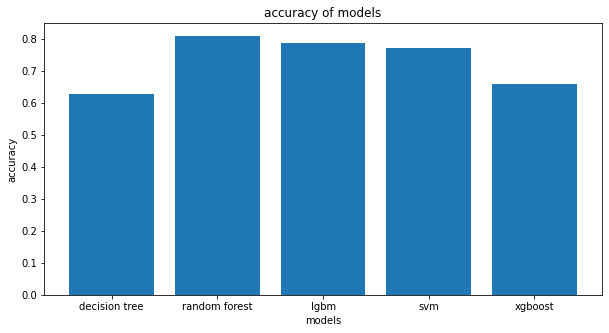

In [ ]:
x=['decision tree','random forest','lgbm','svm','xgboost']
y = [dt_score,rf_score,lgb_score,sv_score,xgb_r_score]
plt.figure(figsize=(10,5))
plt.bar(x,y)
plt.xlabel('models')
plt.ylabel("accuracy")
plt.title('accuracy of models')
plt.show()

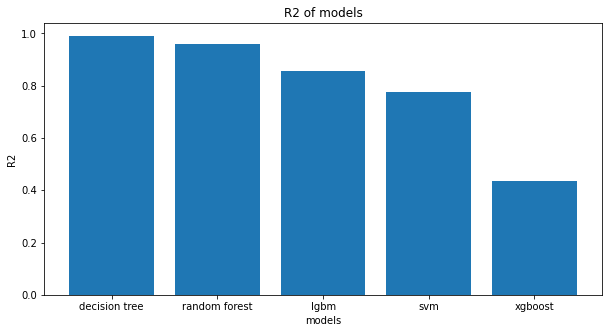

In [ ]:
x=['decision tree','random forest','lgbm','svm','xgboost']
y = [dt_r2_train,rf_r2_train,lgb_r2_train,sv_r2_train,xgb_r_r2_train]
plt.figure(figsize=(10,5))
plt.bar(x,y)
plt.xlabel('models')
plt.ylabel("R2")
plt.title('R2 of models')
plt.show()

In [ ]:
y_test_pred = rf.predict(X_test)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

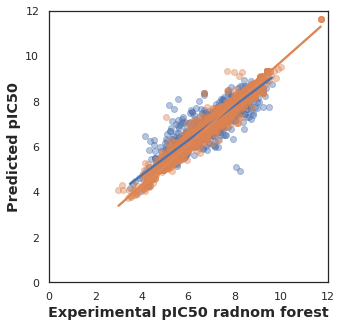

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, y_test_pred, scatter_kws={'alpha':0.4})
ax = sns.regplot(y_train, y_train_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50 radnom forest', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

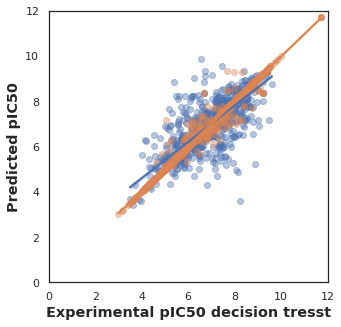

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

y_test_pred = dt.predict(X_test)
y_train_pred = dt.predict(X_train)
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, y_test_pred, scatter_kws={'alpha':0.4})
ax = sns.regplot(y_train, y_train_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50 decision tresst', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

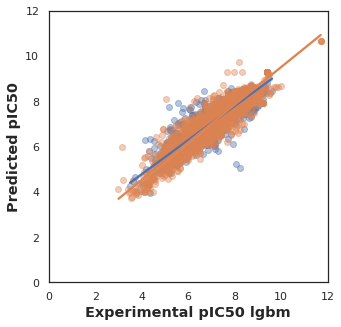

In [ ]:
y_test_pred = lgb.predict(X_test)
y_train_pred = lgb.predict(X_train)
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, y_test_pred, scatter_kws={'alpha':0.4})
ax = sns.regplot(y_train, y_train_pred, scatter_kws={'alpha':0.4})

ax.set_xlabel('Experimental pIC50 lgbm', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

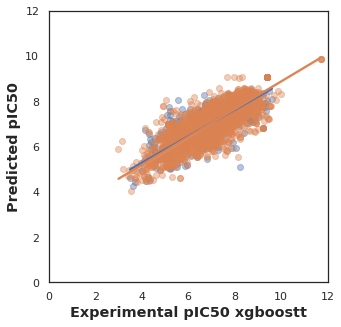

In [ ]:
y_test_pred = xgb_r.predict(X_test)
y_train_pred = xgb_r.predict(X_train)
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, y_test_pred, scatter_kws={'alpha':0.4})
ax = sns.regplot(y_train, y_train_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50 xgboostt', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

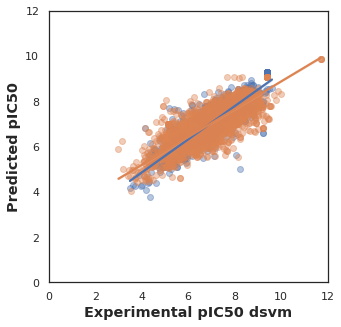

In [ ]:
y_test_pred = sv.predict(X_test)
y_train_pred = xgb_r.predict(X_train)

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, y_test_pred, scatter_kws={'alpha':0.4})
ax = sns.regplot(y_train, y_train_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50 dsvm', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

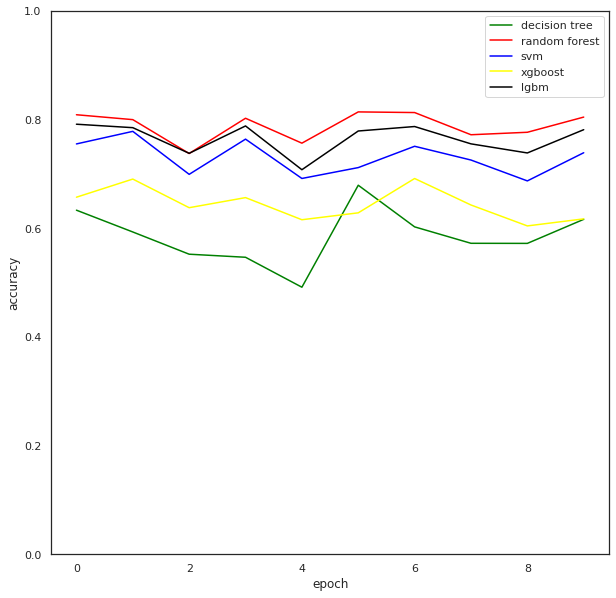

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel('epoch')
plt.ylabel('accuracy',)
x = [45, 1, 34, 78, 100]
plt.ylim(ymax = 1, ymin = 0)
plt.plot(score_dt,color='green')
plt.plot(score_rf,color='red')
plt.plot(score_svm,color='blue')
plt.plot(score_xgb_r,color='yellow')
plt.plot(score_lgb,color='black')
plt.legend(['decision tree','random forest','svm','xgboost','lgbm'])

In [ ]:
import seaborn as sns
sns.pairplot(descriptors)
sns.show()

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fe8fa938280> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 1.62774e+06x1.62774e+06 with 6193 Axes>

In [ ]:
n = [100,200,300,400,500,600,700,800,900]
model = [dt,lgb,xgb_r,sv]


In [ ]:
#decision trees
dtq=[]
for i in range(0,len(n)):
  d = n[i]
  x1= X.iloc[:,0:d]
  dt.fit(x1,y)
  sd= q2(x1,y,dt)
  dtq.append(sd)

  

In [ ]:
y

[0.9900810449247885,
 0.9596232661386747,
 0.8573784527965,
 0.7746186008989191,
 0.43346227491949463]

In [ ]:
xgb_rq=[]
for i in range(0,len(n)):
  d = n[i]
  x1= X.iloc[:,0:d]
  xgb_r.fit(x1,y)
  sd= q2(x1,y,xgb_r)
  xgb_rq.append(sd)


[09:45:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:45:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:45:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:45:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:45:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:45:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:45:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:46:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
lgbq=[]
for i in range(0,len(n)):
  d = n[i]
  x1= X.iloc[:,0:d]
  lgb.fit(x1,y)
  sd= q2(x1,y,lgb)
  lgbq.append(sd)


In [ ]:
svq=[]
for i in range(0,len(n)):
  d = n[i]
  x1= X.iloc[:,0:d]
  sv.fit(x1,y)
  sd= q2(x1,y,sv)
  svq.append(sd)

In [ ]:
rfq=[]
for i in range(0,len(n)):
  d = n[i]
  x1= X.iloc[:,0:d]
  rf.fit(x1,y)
  sd= q2(x1,y,rf)
  rfq.append(sd)

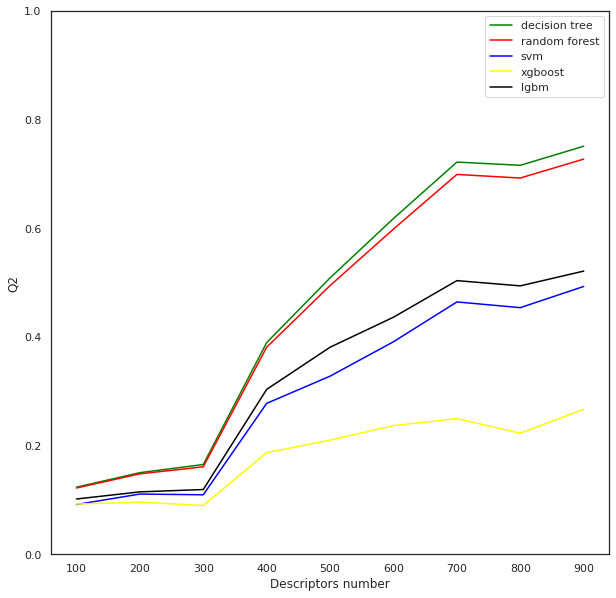

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel('Descriptors number')
plt.ylabel('Q2',)
plt.ylim(ymax = 1, ymin = 0)
default_x_ticks = range(len(n))
plt.plot(dtq,color='green')
plt.plot(rfq,color='red')
plt.plot(svq,color='blue')
plt.plot(xgb_rq,color='yellow')
plt.plot(lgbq,color='black')
plt.xticks(default_x_ticks, n)
plt.legend(['decision tree','random forest','svm','xgboost','lgbm'])

In [ ]:
x1= X.iloc[:,0:i]
x1

In [ ]:
r2_train_list=[]
for i in range(500):
  # Y-Shuffling
  y_train = y_train.sample(frac=1, replace=False, random_state=i)

  lgb.fit(X_train, y_train)
  # Make prediction
  Y_train_pred = lgb.predict(X_train)
  # Compute R2 score
  r2b = r2_score(y_train, Y_train_pred)
  r2_train_list.append(r2b)
# Print R2 score
r2_train_list

[0.37480660492933093,
 0.37410019133963224,
 0.37593572505310935,
 0.38214512833324266,
 0.3796454815627086,
 0.3734873275262002,
 0.3771219070418905,
 0.377131094063754,
 0.3715989450715318,
 0.38268042920791734,
 0.37105078175086026,
 0.3721635152262437,
 0.37296513873162784,
 0.369590571423978,
 0.39552063834514406,
 0.3771070980752078,
 0.3795128610375288,
 0.38066384091053473,
 0.38297468200275986,
 0.3836848516351653,
 0.3625866455501934,
 0.38031535735375943,
 0.3625694644820354,
 0.3846933945934977,
 0.374651931993386,
 0.37277768489892704,
 0.3692594588664053,
 0.37498024369947913,
 0.37209681452833854,
 0.37540998908751844,
 0.3802220931248066,
 0.37808609886170985,
 0.3731201328240651,
 0.3826593037185897,
 0.3690152857535596,
 0.3717983366426285,
 0.36968606656054726,
 0.37675098717784994,
 0.3661408123838359,
 0.38037940444553153,
 0.36980250335674214,
 0.3654860802856481,
 0.38076477950540166,
 0.3632474253345135,
 0.379183659722783,
 0.3818702817150572,
 0.37481093401918

[(0.2, 0.5)]

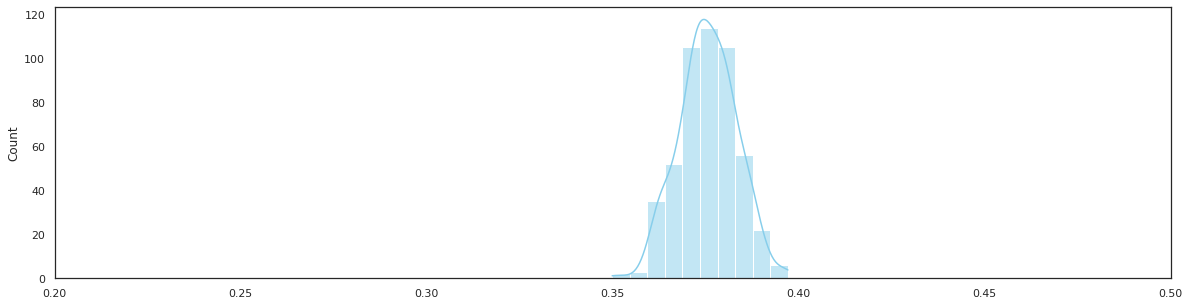

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
plt.figure(figsize = (20, 5)) 

ax = sns.histplot(data=r2_train_list, color="skyblue", kde=True, bins = 10)

ax.set(xlim=(0.2, 0.5))